In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 101)

### Picking up where we left off...

In [2]:
# read in pickled DFs generated by query_dfs.py

df_orders = pd.read_pickle("./pickle/df_orders.pickle")
df_train = pd.read_pickle("./pickle/df_train.pickle")
df_prior = pd.read_pickle("./pickle/df_prior.pickle")
df_prod_detail = pd.read_pickle("./pickle/df_prod_detail.pickle")

In [19]:
# read in pickled feature DF generated by feature_engineering_1.ipynb
X = pd.read_pickle("./pickle/X_5.pickle")

(array([7645837.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  828824.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

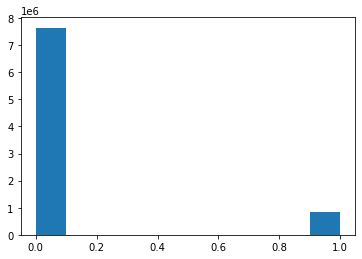

In [20]:
plt.hist(X.in_cart)

In [21]:
X.in_cart.value_counts()

0    7645837
1     828824
Name: in_cart, dtype: int64

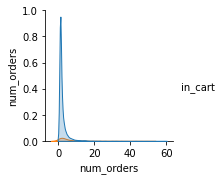

In [22]:
def plot_features(df, sample_size=10000):
    # We don't need to plot the id (prod and user), and the latest cart is a list
    sample = df.drop(['product_id', 'user_id', 'cart'], axis=1) \
               .sample(sample_size, random_state=44)

    g = sns.pairplot(sample, hue='in_cart', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(X)

In [23]:
prod_sales = (df_prior.groupby('product_id')
              .agg({"product_id": "count"})['product_id']
              .sort_values(ascending=False))

prod_sales

product_id
24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
45893         1
13397         1
30451         1
42464         1
25248         1
Name: product_id, Length: 49677, dtype: int64

In [24]:
df_prod_detail.loc[24852]

aisle_id                   24
department_id               4
product_name           Banana
aisle            fresh fruits
department            produce
Name: 24852, dtype: object

In [25]:
X.head(3)

,product_id,user_id,num_orders,cart,in_cart
0,1,138,2,[42475],0
1,907,138,2,[42475],0
2,1000,138,1,[42475],0


In [26]:
# fix this cell

X = (X.merge(prod_sales, left_on='product_id', right_index=True)
    .drop(columns="product_id_x"))
    
X.rename(columns={"product_id_y": "prod_prior_sales"}, inplace=True)
X.head(3)

,product_id,user_id,num_orders,cart,in_cart,prod_prior_sales
0,1,138,2,[42475],0,1852
55,1,709,1,"[4852, 3039, 49535, 14177, 28577, 10279, 27388...",0,1852
190,1,777,1,"[16797, 43352, 6184]",0,1852


### Features to Add:

* `prod_pct_reordered`: product percent of prior transactions that were reorders
* `prod_rank` rank in terms of products sold
* some combination of the above, perhaps?